# Machine Learning - Project 1

## Anub Rai

# Introduction

For this project we assumer that we are asked by a stakeholder to answer a problem with machine learning. In order to answer this we must explore and prepare a dataset to answer the question that our stakeholder might ask us. 

Our stakeholder can be a client, CEO of a ride sharing company or eve the Mayor of New York City who needs a better understanding of Citi Bike ridership. The stake holder in this case would like Citi Bike to add a new feature which would predict the estimated arrival time from a start point ot a end point similar to other ride sharing apps like Uber, lyft etc.

#### Dataset

The dataset is available to all users. It can be obtained from the https://s3.amazonaws.com/tripdata/index.html. From tis dataset we asnwers the questions such as, Where do Citi Bikers ride? When do they ride? How far do they go? Which stations are most popular? What days of the week are most rides taken on? etc. 

The dataset includes:

* Trip Duration (seconds)
* Start Time and Date
* Stop Time and Date
* Start Station Name
* End Station Name
* Station ID
* Station Lat/Long
* Bike ID
* User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
* Gender (Zero=unknown; 1=male; 2=female)
* Year of Birth

###  Target variable

We conduct analysis of New York's Citi Bike Data to visually represent what affect different independent variables like Geographical Coordinates, User Types, Gender etc. have on the predicting Trip Duration given Start & End locations. So by utiising the given attributes and features we will try to predict the Trip DUration of a ride from starting point ot ending point.

In [528]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.patches import Circle
from datetime import datetime
from datetime import date
from datetime import timedelta
from datetime import datetime
import time
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [529]:
#reading data
df = pd.read_csv('https://media.githubusercontent.com/media/AnubRai/Machine-Learning/main/201801-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1


In [530]:
df.shape

(718994, 15)

There are 718994 observations and 15 attributes in this dataset.

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718994 entries, 0 to 718993
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             718994 non-null  int64  
 1   starttime                718994 non-null  object 
 2   stoptime                 718994 non-null  object 
 3   start station id         718994 non-null  int64  
 4   start station name       718994 non-null  object 
 5   start station latitude   718994 non-null  float64
 6   start station longitude  718994 non-null  float64
 7   end station id           718994 non-null  int64  
 8   end station name         718994 non-null  object 
 9   end station latitude     718994 non-null  float64
 10  end station longitude    718994 non-null  float64
 11  bikeid                   718994 non-null  int64  
 12  usertype                 718994 non-null  object 
 13  birth year               718994 non-null  int64  
 14  gend

In [532]:
df.isna().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

Surprisingly, there is no null data in this dataset.

In [533]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

Renaming the columns using underscores.

In [534]:
 df.rename(columns={
     'tripduration':'trip_duration',
     'starttime' : 'start_time',
     'stoptime' : 'stop_time',
     'start station id': 'start_station_id',
     'start station name': 'start_station_name',
     'start station latitude': 'start_lat',
     'start station longitude': 'start_lng',
     'end station id': 'end_station_id',
     'end station name': 'end_station_name',
     'end station latitude': 'end_lat',
     'end station longitude': 'end_lng',    
     'bikeid': 'bike_id',
     'usertype': 'user_type',
     'birth year': 'birth_year',
     'gender' : 'sex'
        }, inplace=True)

In [535]:
df.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,user_type,birth_year,sex
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1


In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718994 entries, 0 to 718993
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       718994 non-null  int64  
 1   start_time          718994 non-null  object 
 2   stop_time           718994 non-null  object 
 3   start_station_id    718994 non-null  int64  
 4   start_station_name  718994 non-null  object 
 5   start_lat           718994 non-null  float64
 6   start_lng           718994 non-null  float64
 7   end_station_id      718994 non-null  int64  
 8   end_station_name    718994 non-null  object 
 9   end_lat             718994 non-null  float64
 10  end_lng             718994 non-null  float64
 11  bike_id             718994 non-null  int64  
 12  user_type           718994 non-null  object 
 13  birth_year          718994 non-null  int64  
 14  sex                 718994 non-null  int64  
dtypes: float64(4), int64(6), object(5)

In [538]:
#check for duplicates
df[df.duplicated()]

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,user_type,birth_year,sex


No duplicates were found.

In [540]:
# Create a new dataset with the categorical variables
data_cato = df[['end_station_name','start_station_name','user_type']]
# To check whether the dataset created properly
data_cato.head()

,end_station_name,start_station_name,user_type
0,6 Ave & W 33 St,W 52 St & 11 Ave,Subscriber
1,8 Ave & W 31 St,W 52 St & 11 Ave,Subscriber
2,W 34 St & 11 Ave,W 52 St & 11 Ave,Subscriber
3,8 Ave & W 52 St,W 52 St & 11 Ave,Subscriber
4,Amsterdam Ave & W 66 St,W 52 St & 11 Ave,Subscriber


In [541]:
data_num = df.drop(data_cato,axis=1)
# data_num = df_num.drop(columns=['url','timedelta'],axis=1)
data_num.columns

Index(['trip_duration', 'start_time', 'stop_time', 'start_station_id',
       'start_lat', 'start_lng', 'end_station_id', 'end_lat', 'end_lng',
       'bike_id', 'birth_year', 'sex'],
      dtype='object')

In [542]:
#get summary statistics for each numeric variable, including mean, standard deviation, median, quartiles, and range
data_num.describe()

,trip_duration,start_station_id,start_lat,start_lng,end_station_id,end_lat,end_lng,bike_id,birth_year,sex
count,7.189940e+05,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000,718994.000000
mean,8.268107e+02,1469.519095,40.737894,-73.982934,1460.948474,40.737620,-73.983203,26078.046315,1977.765945,1.169969
std,3.279694e+04,1398.626487,0.044702,0.018219,1396.759046,0.044525,0.018273,6311.931441,12.016931,0.472668
min,6.100000e+01,72.000000,40.646538,-74.017134,72.000000,40.646538,-74.033552,14529.000000,1885.000000,0.000000
25%,3.190000e+02,377.000000,40.719079,-73.994685,376.000000,40.719105,-73.994758,19558.000000,1969.000000,1.000000
50%,5.100000e+02,497.000000,40.739355,-73.985649,497.000000,40.739323,-73.986580,28538.000000,1980.000000,1.000000
75%,8.420000e+02,3170.000000,40.756687,-73.974987,3169.000000,40.756405,-73.975232,31571.000000,1988.000000,1.000000
max,1.951005e+07,3664.000000,45.506364,-73.568906,3664.000000,45.506364,-73.568906,33522.000000,2002.000000,2.000000


### EDA 

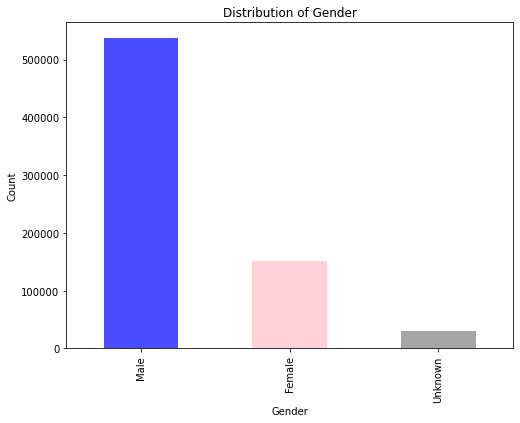

In [544]:
# Map the numeric values to corresponding labels
sex_labels = {0: 'Unknown', 1: 'Male', 2: 'Female'}
df['sex_label'] = df['sex'].map(sex_labels)

# Count the number of each sex
sex_counts = df['sex_label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar', color=[ 'blue', 'pink', 'gray',], alpha=0.7)

# Adding title and labels
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

In [545]:
#Counting the number of categories for User Types
df["user_type"].value_counts()

Subscriber    696886
Customer       22108
Name: user_type, dtype: int64

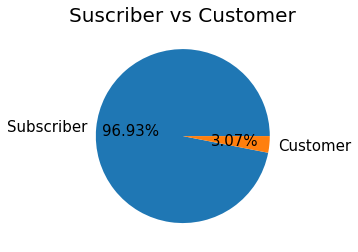

In [546]:
#number of subscribers(annual pass) vs customers(24 hours/3day pass)
user_type_count = df['user_type'].value_counts()
plt.pie(user_type_count.values, labels=user_type_count.index ,autopct='%1.2f%%', textprops={'fontsize': 15} )
plt.title('Suscriber vs Customer', fontsize=20)
plt.show()

In [547]:
print('Unique Birth Years in the Dataset: \n',(df['birth_year'].unique()),'\n')

Unique Birth Years in the Dataset: 
 [1992 1969 1956 1974 1968 1978 1983 1947 1982 1991 1963 1967 1964 1965
 1973 1977 1996 1985 1960 1962 1959 1966 1957 1979 1989 1987 1988 1984
 1980 1995 1958 1970 1994 1972 1971 1955 1993 1990 1952 1954 1975 1976
 1953 1998 1997 1981 1946 1950 1951 2000 1999 1986 1948 1961 1949 1944
 2001 1945 1942 1937 1939 1940 1900 1943 1941 1938 1929 1918 1923 1912
 1885 1936 1931 1899 1887 1934 2002 1932 1886 1921 1910 1933 1894 1917
 1935 1901 1916 1919] 



The dataset contains some unrealistic age values. These can safely be removed.
A Box plot can visualize the outliers/unrealistic values better.

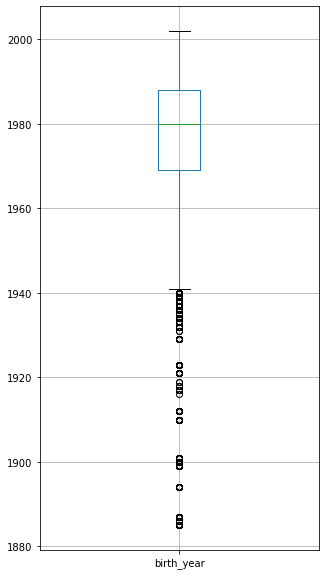

In [548]:
boxplot = df.boxplot(column =['birth_year'], figsize=(5,10))

In [549]:
#Identifying People born before 1948 (80 Years and Older)
df = df[(df['birth_year'] >= 1948.0)]
df.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,user_type,birth_year,sex,sex_label
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,Male
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,Male
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,Male
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,Male
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,Male


We can safely conclude that all the unrealistic birth years in our dataset were removed. We did this becauase it is unlikely for senior citizens aged 80 or above to cycle.

### Trip Duration by User Type

In [550]:
#Addressing the large number of Trip Durations
df['trip_duration'].max()

19510049

Checking to see if there are data that are potentially outliers.

In [551]:
#Row which has this abnormally large distance value
df.loc[df['trip_duration']==df['trip_duration'].max()]

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,user_type,birth_year,sex,sex_label
476336,19510049,2018-01-22 18:20:27.5120,2018-09-05 14:47:56.8680,3082,Hope St & Union Ave,40.711674,-73.951413,144,Nassau St & Navy St,40.698399,-73.980689,30503,Customer,1953,1,Male


In [552]:
df.nlargest(5, ['trip_duration'])

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,user_type,birth_year,sex,sex_label
476336,19510049,2018-01-22 18:20:27.5120,2018-09-05 14:47:56.8680,3082,Hope St & Union Ave,40.711674,-73.951413,144,Nassau St & Navy St,40.698399,-73.980689,30503,Customer,1953,1,Male
687964,11699746,2018-01-28 03:51:28.6140,2018-06-12 14:47:15.5830,3537,Carlton Ave & Dean St,40.680974,-73.971010,3245,NYCBS DEPOT - DELANCEY,40.716444,-73.982331,19957,Customer,1969,0,Unknown
369257,11138807,2018-01-27 15:37:18.0190,2018-06-05 14:44:05.5910,501,FDR Drive & E 35 St,40.744219,-73.971212,3245,NYCBS DEPOT - DELANCEY,40.716444,-73.982331,15336,Customer,1969,0,Unknown
656565,8121483,2018-01-14 11:53:04.4690,2018-04-18 12:51:08.1620,3440,Fulton St & Adams St,40.692418,-73.989495,3432,NYCBS Depot - GOW,40.669060,-73.994637,25788,Subscriber,1962,1,Male
70386,4421929,2018-01-08 07:38:01.5450,2018-02-28 11:56:51.4850,270,Adelphi St & Myrtle Ave,40.693083,-73.971789,3652,NYCBS Depot - 3AV,40.670133,-73.992308,17558,Subscriber,1983,2,Female


Realistically, even if a rider decides to rent the bike overnight, the total trip duration shouldn't exceed 48 hours at the most. Therefore, we can decide to remove all those trip durations that exceed around 24-27 hrs. 
We first find out what effect would dropping those rows have on the dataset.

In [553]:
#Rows that exceed our set threshold of trip duration
df_trip_dur = df.loc[df['trip_duration']>=9999]
df_trip_dur.shape

(765, 16)

In [554]:
#Percentage of trip durations that exceed 24 hours in the dataset
(df_trip_dur.shape[0] / df["trip_duration"].shape[0])*100

0.10725882887379631

Rows that have trip duration of more than 9999 seconds (2.7 hrs) constitute about 0.002% of the entire dataset. There is no harm in dropping these rows if by doing so, we can visualize our data well without compromising the effectivity of our predictive model.

In [555]:
#Dropping the stated rows
df = df.loc[df['trip_duration']<=9999]
df.shape

(712463, 16)

In [556]:
df['trip_duration'].describe()

count    712463.000000
mean        668.561600
std         544.703269
min          61.000000
25%         319.000000
50%         509.000000
75%         840.000000
max        9996.000000
Name: trip_duration, dtype: float64

In [557]:
df.nlargest(5, ['trip_duration'])

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,user_type,birth_year,sex,sex_label
227949,9996,2018-01-25 12:40:26.7350,2018-01-25 15:27:03.5440,418,Front St & Gold St,40.702240,-73.982578,494,W 26 St & 8 Ave,40.747348,-73.997236,30480,Subscriber,1954,2,Female
89896,9986,2018-01-21 18:21:58.7990,2018-01-21 21:08:25.4900,293,Lafayette St & E 8 St,40.730207,-73.991026,238,Bank St & Washington St,40.736197,-74.008592,32659,Subscriber,1991,1,Male
614587,9982,2018-01-18 12:13:42.9430,2018-01-18 15:00:05.8240,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,3404,7 St & 5 Ave,40.670492,-73.985417,29877,Subscriber,1987,2,Female
213631,9953,2018-01-12 13:38:04.1890,2018-01-12 16:23:57.8660,403,E 2 St & 2 Ave,40.725029,-73.990697,335,Washington Pl & Broadway,40.729039,-73.994046,30460,Subscriber,1973,1,Male
529190,9893,2018-01-27 10:30:25.1780,2018-01-27 13:15:18.6460,3163,Central Park West & W 68 St,40.773407,-73.977825,514,12 Ave & W 40 St,40.760875,-74.002777,21209,Customer,1969,2,Female


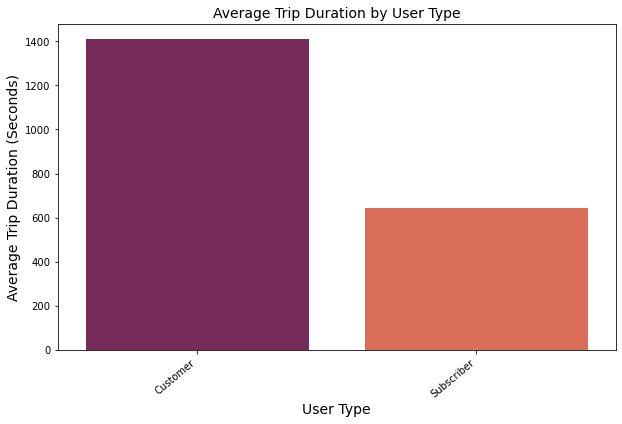

In [558]:
# Calculating Trip Duration
df_TD = pd.DataFrame()
df_TD['Avg. Trip Duration'] = round(df.groupby('user_type')['trip_duration'].mean(), 2)
df_TD = df_TD.reset_index()
df_TD['user_type'] = df_TD['user_type'].astype('object')

# Grouping User Types with the average duration for their respective trips
grouped_user = df[["user_type", "trip_duration"]]
grouped_user = grouped_user.groupby(['user_type'], as_index=False).mean()

# Plotting
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='user_type', y='Avg. Trip Duration', data=df_TD, palette='rocket')

# Adding title and labels
ax2.set_title('Average Trip Duration by User Type', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha='right')
ax2.set_xlabel('User Type', fontsize=14)
ax2.set_ylabel('Average Trip Duration (Seconds)', fontsize=14)

plt.show()

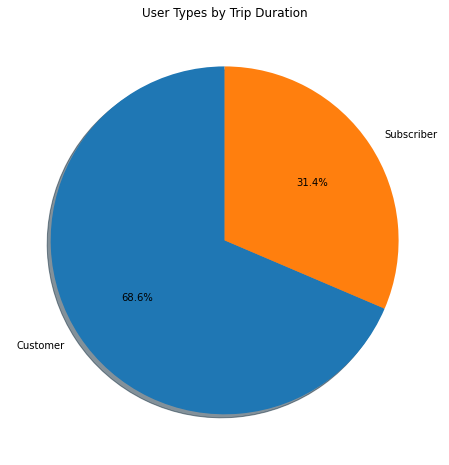

In [559]:
# Assuming grouped_user is already defined from your previous code
# If not, you may need to recalculate grouped_user based on your DataFrame

# Grouping User Types with the sum of trip durations for their respective trips
grouped_df_pie = grouped_user.groupby('user_type', as_index=False).sum()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(grouped_df_pie['trip_duration'], labels=grouped_df_pie['user_type'], autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('User Types by Trip Duration')
plt.show()


### Most Popular Trips 

We find out the most popular trips based on Start Station and End Station. For this we look at the combinations of Start Station & End Stations that occur most frequenty and perform feature engineering. For this we creates a new column 'Count' in the DataFrame using the groupby method to group the DataFrame by the combination of 'start_station_name' and 'end_station_name'. It  counts of occurrences for each unique combination of start and end stations and stores this count in the 'Count' column, and then identifies the rows (start and end stations) with the highest occurring count. 

In [560]:
#Engineering Features 'Counts' and 'Max' for this
#We first group the start and end stations together and transform the dataset
df['Count']=df.groupby(['start_station_name','end_station_name'])['end_station_name'].transform('size')

#We than calculate the no. of times that unique combination of start and end stations occurs in the dataset
#df['Max']=df.groupby(['Start Station Name'])['Count'].transform('max')==df['Count']
df3 = df[['start_station_name','end_station_name','Count']]

#Highest Occuring Count
highest_count = df3.Count.max()


#Required Combination
df3.loc[df3['Count'] == highest_count].head(1)

,start_station_name,end_station_name,Count
236389,E 7 St & Avenue A,Cooper Square & Astor Pl,533


Now we know that the most popular trips were between Stations *E 7 St & Avenue A* and *Cooper Square & Astor Pl*

In order to visualize the most popular trip routes, we first list out the 5 most frequently used routes and give them Route IDs

In [561]:
df_pop = df[['start_station_name','end_station_name','Count']]
df_pop = df_pop.groupby(['Count'], as_index = False).sum()

df_pop.tail(5)

,Count,start_station_name,end_station_name
194,279,S 4 St & Wythe AveS 4 St & Wythe AveS 4 St & W...,N 6 St & Bedford AveN 6 St & Bedford AveN 6 St...
195,292,W 63 St & BroadwayW 63 St & BroadwayW 63 St & ...,Broadway & W 60 StBroadway & W 60 StBroadway &...
196,303,W 21 St & 6 AveW 21 St & 6 AveW 21 St & 6 AveW...,9 Ave & W 22 St9 Ave & W 22 St9 Ave & W 22 St9...
197,326,Pershing Square NorthPershing Square NorthPers...,Broadway & W 32 StBroadway & W 32 StBroadway &...
198,533,E 7 St & Avenue AE 7 St & Avenue AE 7 St & Ave...,Cooper Square & Astor PlCooper Square & Astor ...


For better Visualization, our bar plots needs to have x-labels as the specific routes which are identified as the most popular ones. We will give names to Start & End station routes by adding new columns.

In [562]:
#A new column with start station code (limited characters identifying the station name)
df_pop['start_code'] = df_pop['start_station_name'].apply(lambda x : x[0:10])

#A new column with end station code (limited characters identifying the station name)
df_pop['end_code'] = df_pop['end_station_name'].apply(lambda x : x[0:10])

#A new column that shows the route with codes for the bar plots
df_pop['route_code'] = df_pop['start_code'] + ' - ' + df_pop['end_code']
df_pop.tail(5)


,Count,start_station_name,end_station_name,start_code,end_code,route_code
194,279,S 4 St & Wythe AveS 4 St & Wythe AveS 4 St & W...,N 6 St & Bedford AveN 6 St & Bedford AveN 6 St...,S 4 St & W,N 6 St & B,S 4 St & W - N 6 St & B
195,292,W 63 St & BroadwayW 63 St & BroadwayW 63 St & ...,Broadway & W 60 StBroadway & W 60 StBroadway &...,W 63 St &,Broadway &,W 63 St & - Broadway &
196,303,W 21 St & 6 AveW 21 St & 6 AveW 21 St & 6 AveW...,9 Ave & W 22 St9 Ave & W 22 St9 Ave & W 22 St9...,W 21 St &,9 Ave & W,W 21 St & - 9 Ave & W
197,326,Pershing Square NorthPershing Square NorthPers...,Broadway & W 32 StBroadway & W 32 StBroadway &...,Pershing S,Broadway &,Pershing S - Broadway &
198,533,E 7 St & Avenue AE 7 St & Avenue AE 7 St & Ave...,Cooper Square & Astor PlCooper Square & Astor ...,E 7 St & A,Cooper Squ,E 7 St & A - Cooper Squ


In [563]:
#5 Most popular routes along with their frequency stored in dataframe
popular_trips_names = df_pop.tail(5)
popular_trips_names

,Count,start_station_name,end_station_name,start_code,end_code,route_code
194,279,S 4 St & Wythe AveS 4 St & Wythe AveS 4 St & W...,N 6 St & Bedford AveN 6 St & Bedford AveN 6 St...,S 4 St & W,N 6 St & B,S 4 St & W - N 6 St & B
195,292,W 63 St & BroadwayW 63 St & BroadwayW 63 St & ...,Broadway & W 60 StBroadway & W 60 StBroadway &...,W 63 St &,Broadway &,W 63 St & - Broadway &
196,303,W 21 St & 6 AveW 21 St & 6 AveW 21 St & 6 AveW...,9 Ave & W 22 St9 Ave & W 22 St9 Ave & W 22 St9...,W 21 St &,9 Ave & W,W 21 St & - 9 Ave & W
197,326,Pershing Square NorthPershing Square NorthPers...,Broadway & W 32 StBroadway & W 32 StBroadway &...,Pershing S,Broadway &,Pershing S - Broadway &
198,533,E 7 St & Avenue AE 7 St & Avenue AE 7 St & Ave...,Cooper Square & Astor PlCooper Square & Astor ...,E 7 St & A,Cooper Squ,E 7 St & A - Cooper Squ


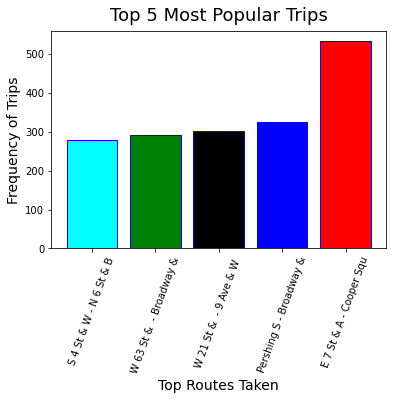

In [564]:
# Setting the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'sans-serif', 'size':'18', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'sans-serif', 'size':'14'}

#Visualizing with Bar Plot
plt.bar(popular_trips_names['route_code'], popular_trips_names['Count'],
        color=['cyan', 'green', 'black', 'blue', 'red'],
        edgecolor='blue')
plt.title('Top 5 Most Popular Trips', **title_font)
plt.xlabel('Top Routes Taken', **axis_font)
plt.xticks(rotation=70)
plt.ylabel('Frequency of Trips', **axis_font)
plt.show()

### Busiest Bike in NYC in 2018

To find the busiest bike we evaluate How many times was it used? How many minutes was it used for?

In [565]:

#Numeric Bike ID values need to be converted to String data type
df['bike_id'] = df['bike_id'].astype(str)

#Number of times the busiest bike was used
df_bike_use = pd.DataFrame()
df_bike_use = df.groupby(['bike_id']).size().reset_index(name = 'Number of Times Used')
df_bike_use = df_bike_use.sort_values('Number of Times Used', ascending = False)
df_bike_use = df_bike_use[:10]
df_bike_use['bike_id'] = df_bike_use['bike_id'].astype(str)
df_bike_use['bike_id'] = ('bike_id' + df_bike_use['bike_id'])

df_bike_use.head(10)

,bike_id,Number of Times Used
8713,bike_id31453,221
9015,bike_id31962,217
8724,bike_id31465,213
8869,bike_id31623,212
10091,bike_id33105,212
9152,bike_id32105,212
7396,bike_id29984,208
7369,bike_id29957,206
9138,bike_id32090,205
10419,bike_id33447,204


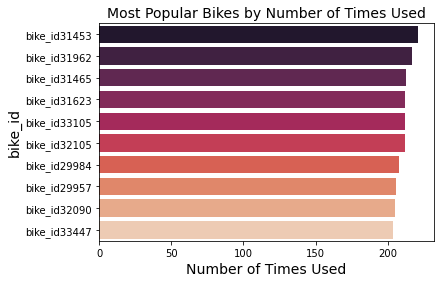

In [566]:
# #Visualizing
ax4 = sns.barplot(x='Number of Times Used', y='bike_id', data=df_bike_use, palette="rocket")
ax4.set_title('Most Popular Bikes by Number of Times Used', fontsize=14)
ax4.set_xlabel("Number of Times Used", fontsize=14)
ax4.set_ylabel("bike_id", fontsize=14)


plt.show()

In [567]:
df.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,user_type,birth_year,sex,sex_label,Count
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,Male,8
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,Male,23
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,Male,37
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,Male,33
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,Male,7


### Calculating Distance Travelled

Using the coordinates provided we will calculate the distance.

In [568]:
#Adding Distance Travelled using Latitude and Longitudes
radius = 6373 #Earth's Radius in units km
def DistanceTravelled(df):
  lat1 = df['start_lat']
  long1 = df['start_lng']
  lat2 = df['end_lat']
  long2 = df['end_lng']

  dlat = math.radians(lat2-lat1)
  dlong = math.radians(long2-long1)
  a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlong/2) * math.sin(dlong/2)
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
  d = (radius * c)*1000

  return d

In [569]:
df['Distance Travelled (Meters)'] = df.apply(DistanceTravelled, axis = 1)
df['Median Speed (m/s)'] = (df['Distance Travelled (Meters)']/df['trip_duration'])
df.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,user_type,birth_year,sex,sex_label,Count,Distance Travelled (Meters),Median Speed (m/s)
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,Male,8,2082.162021,2.146559
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,Male,23,1857.163827,2.568691
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,Male,37,1436.715008,2.896603
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,Male,33,838.302123,2.739549
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,Male,7,1131.459701,3.697581


In [570]:
df['Distance Travelled (Meters)'].value_counts()

0.000000       9160
691.446643      697
805.930051      510
522.700362      489
811.828450      471
               ... 
6435.749106       1
3599.541048       1
1932.350568       1
3333.321721       1
1692.732511       1
Name: Distance Travelled (Meters), Length: 69699, dtype: int64

### Circular Trips 

We can see that of the different distances travelled, we have a vast majority of those as zero meters, meaning the Start & the End Station for those journeys were the same. These 'circular trips' are very much possible in real life scenario! These could include cases where bikes were hired for a prolonged journey and returned at the same spot. But previusly, our function defaults those trips to have travelled 0 distance if only the trip duration too was minimal.

But in these cases, distance and speed both will have 0 values and the trip duration will certainly be more than 90 seconds. This will be an issue when during feature pre-processing, we subject these columns through log transformation or scaling.

In [571]:
#Lets take a look at the Time Durations of trips that have 0 distance travelled
df.loc[df['Distance Travelled (Meters)'] == 0.00, 'trip_duration']
start_end_same = df.loc[df['Distance Travelled (Meters)'] == 0.00,
                        'trip_duration'].iloc[0:]
start_end_same = pd.DataFrame(data = start_end_same, index = None)
start_end_same.head()

,trip_duration
72,520
78,2405
84,313
142,602
255,359


In [572]:
start_end_same.shape[0]

9160

In [573]:
start_end_same.describe()

,trip_duration
count,9160.000000
mean,1142.288100
std,1120.208878
min,61.000000
25%,351.000000
50%,887.000000
75%,1575.000000
max,9852.000000


It is important to decide what should be done with these values as they are significant enough to make a difference to our target variable 'Time Duration'. We cannot ignore them given that their distribution is not uniform (mean & 50% are not similar)? Since out goal is to be able to predict how much time it will take for a rider to get to different places, realistically speaking, we'd like to help those who want to plan their journey between two distinct points

Besides, this data is irrelevant for predictive modelling in this case. Someone on a circular trip can obviously be assumed to know the trip duration and doesn't need our model to tell them that. Hence, we can safely decide to drop these values.

In [574]:
print(df.loc[df['start_lat'] == 0.00, 'Distance Travelled (Meters)'])
print(df.loc[df['start_lng'] == 0.00, 'Distance Travelled (Meters)'])
print(df.loc[df['end_lat'] == 0.00, 'Distance Travelled (Meters)'])
print(df.loc[df['end_lng'] == 0.00, 'Distance Travelled (Meters)'])

Series([], Name: Distance Travelled (Meters), dtype: float64)
Series([], Name: Distance Travelled (Meters), dtype: float64)
Series([], Name: Distance Travelled (Meters), dtype: float64)
Series([], Name: Distance Travelled (Meters), dtype: float64)


In [575]:
#Dropping rows where distance & speed = 0
df = df[df['Distance Travelled (Meters)'] !=0]
df.shape

(703303, 19)

### Pre-processed Data for Modelling

Now we have clean data with new engineered attributes for modelling. The data looks like below:

In [576]:
df.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,user_type,birth_year,sex,sex_label,Count,Distance Travelled (Meters),Median Speed (m/s)
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,Male,8,2082.162021,2.146559
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,Male,23,1857.163827,2.568691
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,Male,37,1436.715008,2.896603
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,Male,33,838.302123,2.739549
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,Male,7,1131.459701,3.697581


In [577]:
df.shape

(703303, 19)

In [578]:
df.columns

Index(['trip_duration', 'start_time', 'stop_time', 'start_station_id',
       'start_station_name', 'start_lat', 'start_lng', 'end_station_id',
       'end_station_name', 'end_lat', 'end_lng', 'bike_id', 'user_type',
       'birth_year', 'sex', 'sex_label', 'Count',
       'Distance Travelled (Meters)', 'Median Speed (m/s)'],
      dtype='object')

Now, we need to be able to predict the duration of the trip given Start & End Destinations. 

### Helper Functions

In [580]:
# Functions that we will use later on
def data_info(data):
    return data.info()

def creating_boxplots(size, target, features, data):
    plt.figure(figsize=size)
    for i in range(len(numerical_vars)):
        plt.subplot(5, 3, i+1)
        sns.boxplot(x=target, y=features[i], data=data )
        
def creating_distplot(size, data, features):
#     plt.figure(figsize=size)
#     for i in range(len(features)):
#         plt.subplot(5, 3, i+1)
#         sns.histplot(data=data, x=features[i])
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(5, 3, i+1)
        sns.distplot(data[features[i]])
        
        
def crossCorrelation(data):
    corr = data.corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, 
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)
    print(corr)

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName,
                       ax=ax1)

    plt.title(Title)
    plt.xlabel('trip_duration')
    plt.ylabel('Mean Values')
    plt.show()
    plt.close()

def RushHour(time):
  if ((time).hour >= 0 and (time).hour < 7):
    return 'Not Rush Hour'
  elif ((time).hour >= 7 and (time).hour < 13):
    return 'During Rush Hour'
  elif ((time).hour >= 13 and (time).hour < 14):
    return 'During Rush Hour'
  elif ((time).hour >= 14 and (time).hour < 17):
    return 'Not Rush Hour'
  elif ((time).hour >=17 and (time).hour < 19):
    return 'During Rush Hour'
  else:
    return 'Not Rush Hour'

#Using Pandas series to sort out time of year and day of week.
def get_date_info(df):
  df['d_week'] = df['start_time'].dt.dayofweek
  #df['m_of_year'] = df['Start Time'].dt.month
  df['Time_of_Day'] = df['start_time'].dt.hour

  #Weekend or not? 1.0 = Weekday, 0.0 = Weekend
  df['d_week'] = (df['d_week']<5).astype(int)

  # Winter(0), Spring(1), Summer(2) and Fall(9)
  #df['m_of_year'] = df['m_of_year'].replace(to_replace=[12,1,2], value = 0)
  #df['m_of_year'] = df['m_of_year'].replace(to_replace=[3,4], value = 1)
  #df['m_of_year'] = df['m_of_year'].replace(to_replace=[5,6,7,8], value = 2)
  #df['m_of_year'] = df['m_of_year'].replace(to_replace=[9,10,11], value = 3)

  # Night (20:00 - 5:00), Morning (5:00 - 12:00), Afternoon (12:00 - 15:00),
  # Evening (15:00 - 20:00)
  df['Time_of_Day'] = pd.cut(df['Time_of_Day'], bins = [-1, 5, 12, 15, 20, 23],
                             labels = ['Night', 'Morning', 'Afternoon',
                                       'Evening', 'Late Night'])
  
  df['Time_of_Day'] = df['Time_of_Day'].replace(to_replace = 'Late Night',
                                                value = 'Night')
  df['Time_of_Day'] = df['Time_of_Day'].cat.remove_unused_categories()
    
  #df['m_of_year'] = df['m_of_year'].astype('category')
  df['d_week'] = df['d_week'].astype('category')

  return(df)

# Function to Find average speed as a function of Rider User Type and Trip route
def get_speed_distance(df):

  df['start_station_name'] = df['start_station_name'].astype(str)
  df['end_station_name'] = df['end_station_name'].astype(str)
  df['Trip'] = df['start_station_name'] + ' TO ' + df['end_station_name']
  df['Trip'] = df['Trip'].astype('category')
  
  df['route_avg_speed'] = df.groupby(['Trip','user_type'])['Median Speed (m/s)'].transform(lambda x: x.mean())
  df['route_avg_duration'] = df.groupby(['Trip','user_type'])['trip_duration'].transform(lambda x: x.median())
  
  return df

In [581]:
df_model1 = df

In [582]:
df_model1.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,user_type,birth_year,sex,sex_label,Count,Distance Travelled (Meters),Median Speed (m/s)
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1,Male,8,2082.162021,2.146559
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1,Male,23,1857.163827,2.568691
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1,Male,37,1436.715008,2.896603
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1,Male,33,838.302123,2.739549
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1,Male,7,1131.459701,3.697581


In [583]:
df_model1.drop(['birth_year','start_lat',
                'start_lng','end_lat',
                'end_lng','start_station_id','sex_label',
                'end_station_id','Count'], axis = 1, inplace=True)
df_model1.head()

,trip_duration,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,sex,Distance Travelled (Meters),Median Speed (m/s)
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,W 52 St & 11 Ave,6 Ave & W 33 St,31956,Subscriber,1,2082.162021,2.146559
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,W 52 St & 11 Ave,8 Ave & W 31 St,32536,Subscriber,1,1857.163827,2.568691
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,W 52 St & 11 Ave,W 34 St & 11 Ave,16069,Subscriber,1,1436.715008,2.896603
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,W 52 St & 11 Ave,8 Ave & W 52 St,31781,Subscriber,1,838.302123,2.739549
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,W 52 St & 11 Ave,Amsterdam Ave & W 66 St,30319,Subscriber,1,1131.459701,3.697581


In the above code we remove the columns that are not needed for modelling. We drop birth year as it is not needed as we have a column Age. And then once distance is calculated, lats and longs won't be needed either.

In [584]:
print("Dataset Shape:", df_model1.shape)
df_model1.isnull().sum()

Dataset Shape: (703303, 10)


trip_duration                  0
start_time                     0
stop_time                      0
start_station_name             0
end_station_name               0
bike_id                        0
user_type                      0
sex                            0
Distance Travelled (Meters)    0
Median Speed (m/s)             0
dtype: int64

In [585]:
#Converting Bike ID from Num to String data type
#Ensuring that date is formatted correctly

df_model1['bike_id'] = df_model1['bike_id'].astype(str)

df_model1['start_time'] = pd.to_datetime(df_model1['start_time'])
df_model1['stop_time'] = pd.to_datetime(df_model1['stop_time'])
df_model1['start_station_name'] = df_model1['start_station_name'].astype('category')
df_model1['end_station_name'] = df_model1['end_station_name'].astype('category')
df_model1['user_type '] = df_model1['user_type'].astype('category')
df_model1['sex'] = df_model1['sex'].astype('category')
df_model1.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703303 entries, 0 to 718993
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   trip_duration                703303 non-null  int64         
 1   start_time                   703303 non-null  datetime64[ns]
 2   stop_time                    703303 non-null  datetime64[ns]
 3   start_station_name           703303 non-null  category      
 4   end_station_name             703303 non-null  category      
 5   bike_id                      703303 non-null  object        
 6   user_type                    703303 non-null  object        
 7   sex                          703303 non-null  category      
 8   Distance Travelled (Meters)  703303 non-null  float64       
 9   Median Speed (m/s)           703303 non-null  float64       
 10  user_type                    703303 non-null  category      
dtypes: category(4), datetime64

In [586]:
numerical_vars = df_model1[['trip_duration','Distance Travelled (Meters)',
                  'Median Speed (m/s)']]

target = df_model1['trip_duration']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

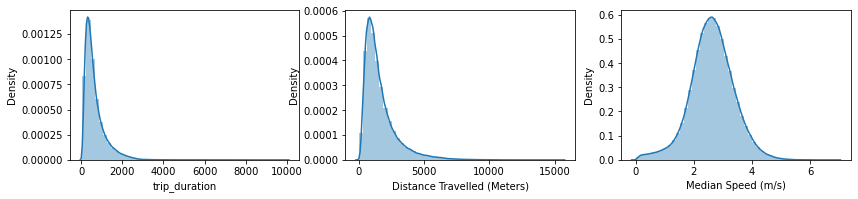

In [588]:
#for numerical features only
num_vars = df_model1.select_dtypes(exclude=['object','category',
                                            'datetime64']).columns

# Creating distribution plots
creating_distplot((14,16), df_model1, num_vars)

In [589]:
df_model1.corr().loc[:,'trip_duration']

trip_duration                  1.000000
Distance Travelled (Meters)    0.765413
Median Speed (m/s)            -0.263977
Name: trip_duration, dtype: float64

                             trip_duration  Distance Travelled (Meters)  \
trip_duration                     1.000000                     0.765413   
Distance Travelled (Meters)       0.765413                     1.000000   
Median Speed (m/s)               -0.263977                     0.227387   

                             Median Speed (m/s)  
trip_duration                         -0.263977  
Distance Travelled (Meters)            0.227387  
Median Speed (m/s)                     1.000000  


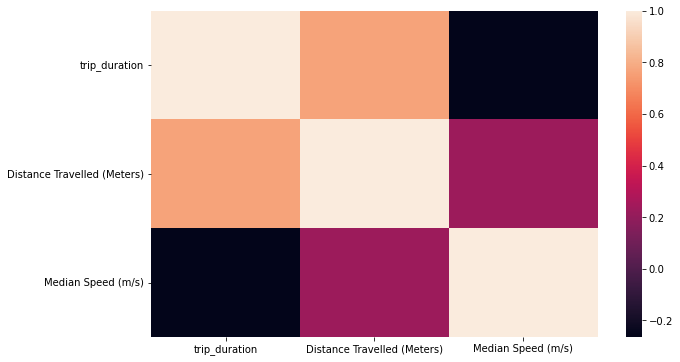

In [590]:
crossCorrelation(df_model1)

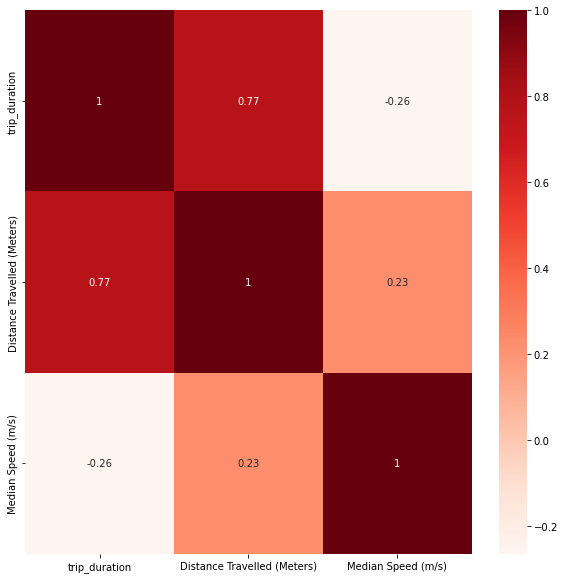

In [591]:
plt.figure(figsize=(10,10))
cor = df_model1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Feature Engineering

### Checking for Rush Hour by checking 'Weekend' and 'Time of the Year'
The Start and Stop times can now serve in categorizing whether a trip was made during a 'Rush Hour' or not. We are mostly looking to determine if the trip was started during a rush hour or not as that can impact the trip duration.

1 = Weekday and 0 = Weekend

From common knowledge, we can apply a function that will help convert the start time to a column stating the traffic condition.

Once the times are converted into Datetime format, we can easily make use of some its inbuilt functions. We will define rush hours according to the traffic usually seen in the early morning, lunch time and evening. Anytime outside that can be called not rush hour.

In [592]:
# Winter(0), Spring(1), Summer(2) and Fall(9)
 # Night (20:00 - 5:00), Morning (5:00 - 12:00), Afternoon (12:00 - 15:00),
  # Evening (15:00 - 20:00)
  
df_model1 = get_date_info(df_model1)

In [593]:
df_model1.head()

,trip_duration,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,sex,Distance Travelled (Meters),Median Speed (m/s),user_type,d_week,Time_of_Day
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,W 52 St & 11 Ave,6 Ave & W 33 St,31956,Subscriber,1,2082.162021,2.146559,Subscriber,1,Afternoon
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,W 52 St & 11 Ave,8 Ave & W 31 St,32536,Subscriber,1,1857.163827,2.568691,Subscriber,1,Afternoon
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,W 52 St & 11 Ave,W 34 St & 11 Ave,16069,Subscriber,1,1436.715008,2.896603,Subscriber,1,Afternoon
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,W 52 St & 11 Ave,8 Ave & W 52 St,31781,Subscriber,1,838.302123,2.739549,Subscriber,1,Afternoon
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,W 52 St & 11 Ave,Amsterdam Ave & W 66 St,30319,Subscriber,1,1131.459701,3.697581,Subscriber,1,Evening


In [594]:
df_model1['Time_of_Day'].value_counts()

Morning      260478
Evening      259731
Afternoon    122607
Night         60487
Name: Time_of_Day, dtype: int64

In [595]:
# 1 = Weekday, 0 = Weekend
df_model1['d_week'].value_counts()

1    556971
0    146332
Name: d_week, dtype: int64

### Checking for Speed based on Trip Route & User Type
Some trips are up hill, others are down hill. Some routes, such as one through times square involve heavy traffic. Customers, will usually ride more slowly with frequent stops than a Subscriber.

Here, we'll see how these factors can correlate with the Trip Duration.

In [596]:
df_model1 = get_speed_distance(df_model1)

In [597]:
df_model1.head(4)

,trip_duration,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,sex,Distance Travelled (Meters),Median Speed (m/s),user_type,d_week,Time_of_Day,Trip,route_avg_speed,route_avg_duration
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,W 52 St & 11 Ave,6 Ave & W 33 St,31956,Subscriber,1,2082.162021,2.146559,Subscriber,1,Afternoon,W 52 St & 11 Ave TO 6 Ave & W 33 St,2.439781,869.5
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,W 52 St & 11 Ave,8 Ave & W 31 St,32536,Subscriber,1,1857.163827,2.568691,Subscriber,1,Afternoon,W 52 St & 11 Ave TO 8 Ave & W 31 St,2.204558,782.0
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,W 52 St & 11 Ave,W 34 St & 11 Ave,16069,Subscriber,1,1436.715008,2.896603,Subscriber,1,Afternoon,W 52 St & 11 Ave TO W 34 St & 11 Ave,2.830120,531.0
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,W 52 St & 11 Ave,8 Ave & W 52 St,31781,Subscriber,1,838.302123,2.739549,Subscriber,1,Afternoon,W 52 St & 11 Ave TO 8 Ave & W 52 St,2.882828,294.0


We see that average trip durations between rush hours & otherwise are quiet equally divided. We can't say if adding this column will be very effective for the predictive model, but we can certainly drop the start and stop times now

Before performing machine learning, we will transform some features to avoid introducing some. As mentioned previously, we have some skewed distributions and they can make our models underperformed. We will apply a logarithmic transformation to reduce the effect of outliers and reduce the distribution's range.

Skewness in Distance Travelled after Log Transformation: 0.0035498146741011


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

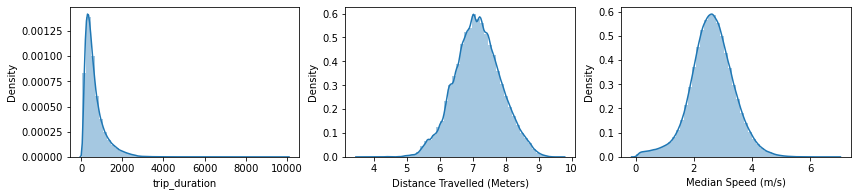

In [598]:
#Log transformation to remove skewnewss
df_model1["Distance Travelled (Meters)"] = np.log(df_model1["Distance Travelled (Meters)"])
print("Skewness in Distance Travelled after Log Transformation:",
      df_model1["Distance Travelled (Meters)"].skew())

creating_distplot((14,16), df_model1, num_vars)

In [599]:
df_model1.head()

,trip_duration,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,sex,Distance Travelled (Meters),Median Speed (m/s),user_type,d_week,Time_of_Day,Trip,route_avg_speed,route_avg_duration
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,W 52 St & 11 Ave,6 Ave & W 33 St,31956,Subscriber,1,7.641162,2.146559,Subscriber,1,Afternoon,W 52 St & 11 Ave TO 6 Ave & W 33 St,2.439781,869.5
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,W 52 St & 11 Ave,8 Ave & W 31 St,32536,Subscriber,1,7.526806,2.568691,Subscriber,1,Afternoon,W 52 St & 11 Ave TO 8 Ave & W 31 St,2.204558,782.0
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,W 52 St & 11 Ave,W 34 St & 11 Ave,16069,Subscriber,1,7.270115,2.896603,Subscriber,1,Afternoon,W 52 St & 11 Ave TO W 34 St & 11 Ave,2.830120,531.0
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,W 52 St & 11 Ave,8 Ave & W 52 St,31781,Subscriber,1,6.731379,2.739549,Subscriber,1,Afternoon,W 52 St & 11 Ave TO 8 Ave & W 52 St,2.882828,294.0
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,W 52 St & 11 Ave,Amsterdam Ave & W 66 St,30319,Subscriber,1,7.031264,3.697581,Subscriber,1,Evening,W 52 St & 11 Ave TO Amsterdam Ave & W 66 St,2.643676,406.0


In [600]:
#We can drop 'Trip' since we only needed it to find avg speed & duration based
# on the trip route and user type.
df_model1.drop(['start_station_name', 'end_station_name', 'bike_id','Trip',
                'start_time', 'stop_time'], axis = 1, inplace = True)
df_model1.drop(['user_type', 'sex', 'd_week', 'Time_of_Day'], axis = 1, 
               inplace = True)

In [601]:
df_model1.head()

,trip_duration,Distance Travelled (Meters),Median Speed (m/s),user_type,route_avg_speed,route_avg_duration
0,970,7.641162,2.146559,Subscriber,2.439781,869.5
1,723,7.526806,2.568691,Subscriber,2.204558,782.0
2,496,7.270115,2.896603,Subscriber,2.830120,531.0
3,306,6.731379,2.739549,Subscriber,2.882828,294.0
4,306,7.031264,3.697581,Subscriber,2.643676,406.0


The above are the features that we can use to predict the Target Variable.

### CONCLUSION

Finally we have made our data ready for modeling. We haven't performed any modelling in this assingment but we have answered all the stake holder questions such as the busiest bikes, trip average etc. We also have featured engineered new attributes such as rush hour, avergae speeds etc. we can make add more data such as weather data and analyse it to make it more accurate.

I will be conducting predective modelling in the future and make improvements as well.